# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [2]:
# Import the titanic dataset here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [3]:
# Code here
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew",
    "restaurant crew": "crew"
})

passengers =  df_titanic[df_titanic["type"] == "passenger"]
passengers.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived,type
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0,passenger
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0,passenger
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0,passenger
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1,passenger
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1,passenger


In [4]:
pd.crosstab(passengers["embarked"], passengers["class"], normalize = True)

class,1st,2nd,3rd
embarked,,,
B,0.002278,0.004556,0.000000
C,0.108580,0.019742,0.077449
Q,0.002278,0.005315,0.085801
S,0.132878,0.186029,0.375095


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [5]:
# Code here
#conditional distrubution of class given where they embarked
joint_ec = pd.crosstab(passengers["embarked"], passengers["class"], normalize = True)
marg_class = joint_ec.sum(axis = 0)
conditional_ec = joint_ec.divide(marg_class)



In [6]:
#conditional distribution of embarked given class
joint_ce = pd.crosstab(passengers["class"], passengers["embarked"], normalize = True)
marg_embarked = joint_ce.sum(axis = 0)
conditional_ce = joint_ce.divide(marg_embarked)

In [7]:
#proportion of 3rd class passengers embarked at Southhampton
conditional_ec.loc["S", "3rd"]

0.6967559943582511

In [8]:
#proportion of Southhampton passengers in 3rd class
conditional_ce.loc["3rd", "S"]

0.5404814004376367

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

<Axes: xlabel='embarked'>

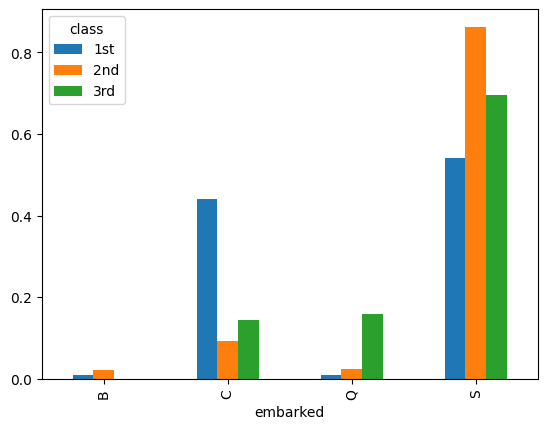

In [ ]:
# Code here
conditional_ec.plot(kind = "bar")